In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
golf_df = pd.read_csv('golfdataset.csv')

In [3]:
golf_df.head()

,Outlook,Temp,Humidity,Windy,PlayGolf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


## Exploratory Data Analysis

In [4]:
golf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Outlook   14 non-null     object
 1   Temp      14 non-null     object
 2   Humidity  14 non-null     object
 3   Windy     14 non-null     bool  
 4   PlayGolf  14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [5]:
golf_df.isnull().sum()

Outlook     0
Temp        0
Humidity    0
Windy       0
PlayGolf    0
dtype: int64

In [6]:
golf_df.nunique()

Outlook     3
Temp        3
Humidity    2
Windy       2
PlayGolf    2
dtype: int64

### Visualization of Categorical Variables

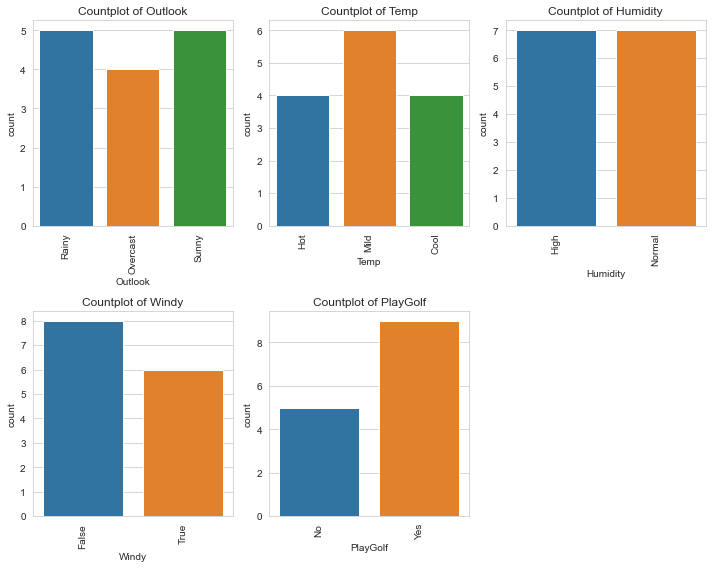

In [7]:
# Set the figure size and style
plt.figure(figsize=(10, 8))

# Iterate over each categorical variable and create countplots
for col in golf_df.columns:
    plt.subplot(2, 3, golf_df.columns.get_loc(col) + 1)
    sns.countplot(data=golf_df, x=col)
    plt.title("Countplot of {}".format(col))
    plt.xticks(rotation=90)
# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


## Encoding Categorical Variables

In [8]:
golf_df.columns

Index(['Outlook', 'Temp', 'Humidity', 'Windy', 'PlayGolf'], dtype='object')

In [17]:
le = LabelEncoder()
golf_df['Outlook']=le.fit_transform(golf_df['Outlook'].values)
golf_df['Temp']=le.fit_transform(golf_df['Temp'].values)
golf_df['Humidity']=le.fit_transform(golf_df['Humidity'].values)
golf_df['Windy']=le.fit_transform(golf_df['Windy'].values)
golf_df['PlayGolf']=le.fit_transform(golf_df['PlayGolf'].values)

In [10]:
golf_df

,Outlook,Temp,Humidity,Windy,PlayGolf
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1
5,2,0,1,1,0
6,0,0,1,1,1
7,1,2,0,0,0
8,1,0,1,0,1
9,2,2,1,0,1


## Training and Testing of the model

In [11]:
# Splittig data into testing and training sets
X = golf_df.drop('PlayGolf', axis=1)
y = golf_df['PlayGolf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
gnb = MultinomialNB()
gnb.fit(X_train, y_train)

MultinomialNB()

In [13]:
y_pred = gnb.predict(X_test)

In [14]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
gnb = BernoulliNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       3.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
